In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt


In [2]:
mpl.rcParams['figure.dpi'] = 200
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False

In [7]:
train = pd.read_csv('./tabular-playground-series-aug-2021/train.csv')
test = pd.read_csv('./tabular-playground-series-aug-2021/test.csv')
sample_submission = pd.read_csv('./tabular-playground-series-aug-2021/sample_submission.csv')

In [8]:
train.head(10)

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f91,f92,f93,f94,f95,f96,f97,f98,f99,loss
0,0,-0.002350,59,0.766739,-1.350460,42.27270,16.68570,30.3599,1.267300,0.392007,...,-42.43990,26.854000,1.45751,0.696161,0.941764,1.828470,0.924090,2.29658,10.48980,15
1,1,0.784462,145,-0.463845,-0.530421,27324.90000,3.47545,160.4980,0.828007,3.735860,...,-184.13200,7.901370,1.70644,-0.494699,-2.058300,0.819184,0.439152,2.36470,1.14383,3
2,2,0.317816,19,-0.432571,-0.382644,1383.26000,19.71290,31.1026,-0.515354,34.430800,...,7.43721,37.218100,3.25339,0.337934,0.615037,2.216760,0.745268,1.69679,12.30550,6
3,3,0.210753,17,-0.616454,0.946362,-119.25300,4.08235,185.2570,1.383310,-47.521400,...,9.66778,0.626942,1.49425,0.517513,-10.222100,2.627310,0.617270,1.45645,10.02880,2
4,4,0.439671,20,0.968126,-0.092546,74.30200,12.30650,72.1860,-0.233964,24.399100,...,290.65700,15.604300,1.73557,-0.476668,1.390190,2.195740,0.826987,1.78485,7.07197,1
5,5,0.105165,106,0.007932,1.276660,3165.14000,1.67015,155.5780,0.782602,-16.373700,...,5168.03000,33.917900,1.62149,1.082260,-3.972420,0.500732,0.628588,2.45744,7.23832,16
6,6,0.601966,9,-0.133924,-0.098238,734.58300,5.86411,16.6928,0.714386,-9.909540,...,-49.42170,28.144900,1.87039,0.417755,4.880680,2.884050,0.115900,1.12773,3.48813,4
7,7,0.177120,11,-0.361778,0.492327,-9.01574,6.56938,211.4200,-0.841209,16.011500,...,-5.51494,42.106500,1.79785,-0.197997,5.953100,2.695590,0.487619,1.23021,7.07088,5
8,8,0.216817,50,0.935978,-0.086906,213.43600,5.13950,136.7050,1.154870,113.220000,...,17560.20000,44.787400,1.49904,0.736440,4.647110,2.097610,0.302990,2.09165,9.73664,7
9,9,0.656791,14,-0.504919,1.547640,153.81300,6.49644,59.2214,0.619670,-37.125200,...,51.70010,12.243400,1.85891,0.061177,-2.514130,1.478190,0.513508,1.27266,2.31615,4


In [9]:
test.head()

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99
0,250000,0.812665,15,-1.239120,-0.893251,295.5770,15.87120,23.04360,0.942256,29.898000,...,0.446389,-422.332,-1.44630,1.69075,1.059300,-3.010570,1.94664,0.529470,1.386950,8.78767
1,250001,0.190344,131,-0.501361,0.801921,64.8866,3.09703,344.80500,0.807194,38.421900,...,0.377179,10352.200,21.06270,1.84351,0.251895,4.440570,1.90309,0.248534,0.863881,11.79390
2,250002,0.919671,19,-0.057382,0.901419,11961.2000,16.39650,273.24000,-0.003300,37.940000,...,0.990140,3224.020,-2.25287,1.55100,-0.559157,17.838600,1.83385,0.931796,2.336870,9.05400
3,250003,0.860985,19,-0.549509,0.471799,7501.6000,2.80698,71.08170,0.792136,0.395235,...,1.396880,9689.760,14.77150,1.41390,0.329272,0.802437,2.23251,0.893348,1.359470,4.84833
4,250004,0.313229,89,0.588509,0.167705,2931.2600,4.34986,1.57187,1.118300,7.754630,...,0.862502,2693.350,44.18050,1.58020,-0.191021,26.253000,2.68238,0.361923,1.532800,3.70660


In [10]:
print(f'Train Shape :  {train.shape}')
print(f'Test Shape :  {test.shape}')

Train Shape :  (250000, 102)
Test Shape :  (150000, 101)


In [11]:
target = train['loss']
train.drop(['id'],axis=1,inplace=True)
test.drop(['id'],axis=1,inplace=True)

In [12]:
train.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f91,f92,f93,f94,f95,f96,f97,f98,f99,loss
0,-0.002350,59,0.766739,-1.350460,42.2727,16.68570,30.3599,1.267300,0.392007,1.09101,...,-42.43990,26.854000,1.45751,0.696161,0.941764,1.828470,0.924090,2.29658,10.48980,15
1,0.784462,145,-0.463845,-0.530421,27324.9000,3.47545,160.4980,0.828007,3.735860,1.28138,...,-184.13200,7.901370,1.70644,-0.494699,-2.058300,0.819184,0.439152,2.36470,1.14383,3
2,0.317816,19,-0.432571,-0.382644,1383.2600,19.71290,31.1026,-0.515354,34.430800,1.24210,...,7.43721,37.218100,3.25339,0.337934,0.615037,2.216760,0.745268,1.69679,12.30550,6
3,0.210753,17,-0.616454,0.946362,-119.2530,4.08235,185.2570,1.383310,-47.521400,1.09130,...,9.66778,0.626942,1.49425,0.517513,-10.222100,2.627310,0.617270,1.45645,10.02880,2
4,0.439671,20,0.968126,-0.092546,74.3020,12.30650,72.1860,-0.233964,24.399100,1.10151,...,290.65700,15.604300,1.73557,-0.476668,1.390190,2.195740,0.826987,1.78485,7.07197,1


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Columns: 101 entries, f0 to loss
dtypes: float64(95), int64(6)
memory usage: 192.6 MB


In [14]:
tmp = train.isnull().sum()
print(tmp)

f0      0
f1      0
f2      0
f3      0
f4      0
       ..
f96     0
f97     0
f98     0
f99     0
loss    0
Length: 101, dtype: int64


In [15]:
tmp2 = test.isnull().sum()
print(tmp2)

f0     0
f1     0
f2     0
f3     0
f4     0
      ..
f95    0
f96    0
f97    0
f98    0
f99    0
Length: 100, dtype: int64


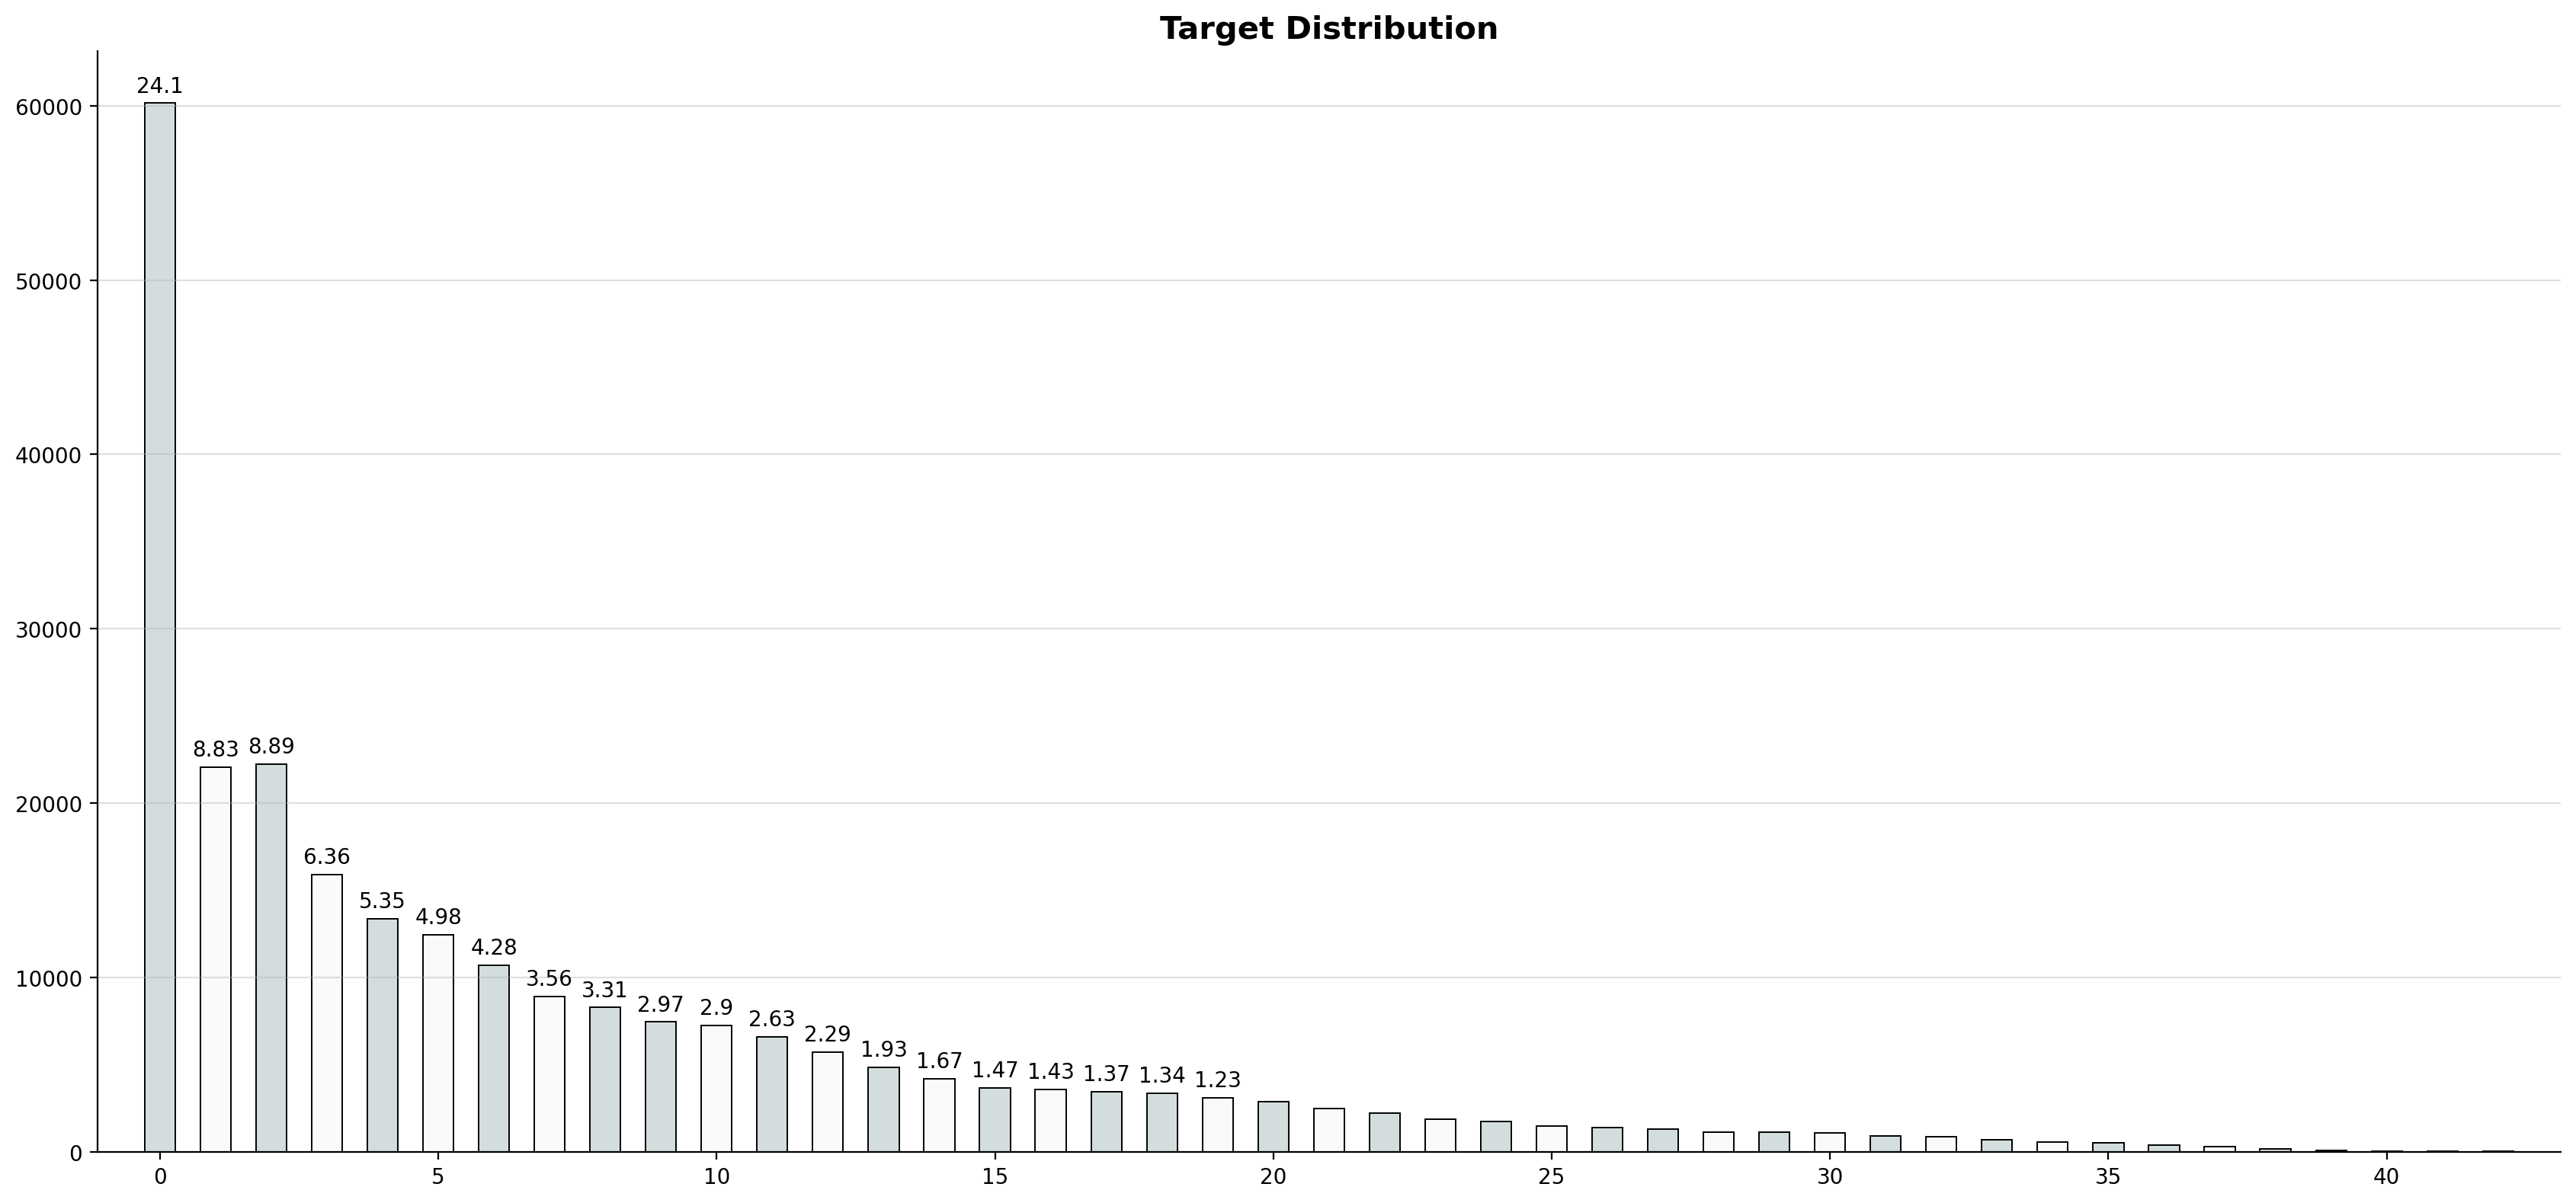

In [17]:
fig,ax = plt.subplots(1,1,figsize=(17,8))

target_cnt = train["loss"].value_counts().sort_index()

ax.bar(target_cnt.index,target_cnt,color=['#d4dddd' if i%2 == 0 else '#fafafa' for i in range(9)],
      width=0.55,
      edgecolor='black',
      linewidth=0.7)

ax.margins(0.02,0.05)

for i in range(20):
    ax.annotate(f'{target_cnt[i]/len(train)*100:.3}',xy=(i,target_cnt[i]+1000),va='center',ha='center')
    
ax.set_title('Target Distribution',weight='bold',fontsize=15)
ax.grid(axis='y',linestyle='-',alpha=0.4)

fig.tight_layout()
plt.show()

In [18]:
target_cnt_df = pd.DataFrame(target_cnt)
target_cnt_df['ratio(%)'] = target_cnt_df/target_cnt.sum()*100
target_cnt_df.sort_values('ratio(%)', ascending=False, inplace=True)
target_cnt_df['cummulated_sum(%)'] = target_cnt_df['ratio(%)'].cumsum()
target_cnt_df.style.bar(subset=['cummulated_sum(%)'], color='#205ff2')

,loss,ratio(%),cummulated_sum(%)
0,60144,24.057600,24.057600
2,22225,8.890000,32.947600
1,22069,8.827600,41.775200
3,15902,6.360800,48.136000
4,13371,5.348400,53.484400
5,12458,4.983200,58.467600
6,10697,4.278800,62.746400
7,8894,3.557600,66.304000
8,8264,3.305600,69.609600
9,7435,2.974000,72.583600


In [19]:
train.describe().T.style.bar(subset=['mean'],color='#205ff2').background_gradient(subset=['std'],cmap='Reds').background_gradient(subset=['50%'],cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
f0,250000.000000,0.511213,0.307884,-0.069273,0.251287,0.514962,0.777323,1.072070
f1,250000.000000,51.378476,42.396636,-17.000000,18.000000,41.000000,75.000000,273.000000
f2,250000.000000,0.107155,1.322200,-7.895580,-0.611172,0.253815,0.759249,9.768590
f3,250000.000000,0.050010,0.792368,-1.475560,-0.719418,0.004099,0.765456,1.680190
f4,250000.000000,3595.133426,6072.401061,-7589.280000,163.864750,943.000500,4115.355000,37847.500000
f5,250000.000000,8.205953,5.475723,-3.291050,4.110127,7.472445,11.030950,35.078000
f6,250000.000000,164.508753,183.335563,-40.967200,27.894900,91.005250,240.843750,947.143000
f7,250000.000000,0.375533,0.813597,-4.143080,-0.026245,0.619862,0.933855,4.010380
f8,250000.000000,16.669745,99.758709,-502.813000,-17.392025,8.714945,55.407625,465.956000
f9,250000.000000,1.190382,0.099700,0.934037,1.132640,1.170370,1.218880,1.712450


In [20]:
discrete_features = []

for col in train.columns:
    if np.array_equal(train[col].values,train[col].values.astype(int)):
        discrete_features.append(col)
        
print(f'Total{len(discrete_features)}:')
print(discrete_features)

Total6:
['f1', 'f16', 'f27', 'f55', 'f86', 'loss']


In [1]:
for dcol in discrete_features:
    print(f'{dcol} unique value : {train[]}')

SyntaxError: invalid syntax (<fstring>, line 1)